Автор материала: Зраев Артем.

Можно использовать в каких угодно целях.

<b> В задании нужно загрузить датасет с данными оттока и ответить на несколько вопросов (написать код). При этом сам датасет уже есть и его необязательно качать с репозитория</b>

Цель задания: проверить базовые навыки работы студентов с Pandas, умение проводить такой же базовый EDA (exploratory data analysis), делать feature engineering и обучать и валидировать модель.

Список столбцов с типами данных в датасете:

- customerID           object
- gender               object
- SeniorCitizen         int64
- Partner              object
- Dependents           object
- tenure                int64
- PhoneService         object
- MultipleLines        object
- InternetService      object
- OnlineSecurity       object
- OnlineBackup         object
- DeviceProtection     object
- TechSupport          object
- StreamingTV          object
- StreamingMovies      object
- Contract             object
- PaperlessBilling     object
- PaymentMethod        object
- MonthlyCharges      float64
- TotalCharges         object
- Churn                object

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


##### 1. Какое соотношение мужчин и женщин в представленном наборе данных?

In [3]:
df['gender'].value_counts(), df['gender'].value_counts() / len(df)

(Male      3555
 Female    3488
 Name: gender, dtype: int64,
 Male      0.504756
 Female    0.495244
 Name: gender, dtype: float64)

##### 2. Какое количество уникальных значений у поля InternetService?

In [4]:
df['InternetService'].unique(), len(df['InternetService'].unique())

(array(['DSL', 'Fiber optic', 'No'], dtype=object), 3)

##### 3. Выведите статистики по полю TotalCharges (median, mean, std).

In [5]:
df['TotalCharges'].describe(), len(df.loc[(df['TotalCharges'] == " ")])

(count     7043
 unique    6531
 top           
 freq        11
 Name: TotalCharges, dtype: object,
 11)

<font color = 'blue'> TotalCharges - нечисловое поле, кое-где есть пробелы вместо значений. Нужно убрать пробелы и перевести поле во числовое.

In [6]:
df.loc[(df['TotalCharges'] == " "), 'TotalCharges'] = 0

In [7]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [8]:
df['TotalCharges'].describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [9]:
median = df['TotalCharges'].median()
mean = df['TotalCharges'].mean()
std = df['TotalCharges'].std()
print(f'{median=}, {mean=}, {std=}')

median=1394.55, mean=2279.734303563826, std=2266.7944696890195


В чем странность того, что вы получили? (подсказка: смотреть нужно на тип данных)

<font color = 'blue'> Ну я в начале сделала, а потом увидела этот вопрос :-))) Под странностью имелось ввиду почему он в дескрайбе не стат данные выводил?

##### 4. Сделайте замену значений поля PhoneService  на числовые (Yes->1, No->0)

In [10]:
df['PhoneService'] = df['PhoneService'].replace(['Yes', 'No'], [1, 0])

In [11]:
df['PhoneService'].unique()

array([0, 1], dtype=int64)

##### 5. Сделайте замену пробелов в поле TotalCharges на np.nan и приведите поле к типу данных float32. Затем заполните оставшиеся пропуски значением 0 с помощью метода fillna у столбца. Снова выведите статистики и сравните с тем, что вы видели в вопросе 3

<font color = 'blue'> Я правильно поняла, что я это уже сделала?

##### 6. Сделайте замену значений поля Churn на числовые (Yes -> 1, No - 0)

In [12]:
df['Churn'] = df['Churn'].replace(['Yes', 'No'], [1, 0])

In [13]:
df['Churn'].unique()

array([0, 1], dtype=int64)

##### 7. Сделайте замену значений полей StreamingMovies, StreamingTV, TechSupport  на числовые (Yes -> 1, No -> 0, No internet service->0)

In [14]:
df['StreamingMovies'] = df['StreamingMovies'].replace(['Yes', 'No', 'No internet service'], [1, 0, 0])
df['StreamingTV'] = df['StreamingTV'].replace(['Yes', 'No', 'No internet service'], [1, 0, 0])
df['TechSupport'] = df['TechSupport'].replace(['Yes', 'No', 'No internet service'], [1, 0, 0])

In [15]:
df['StreamingMovies'].unique(), df['StreamingTV'].unique(), df['TechSupport'].unique()

(array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64))

##### 8. Заполните пропуски в поле PhoneService значением 0

In [16]:
df['PhoneService'].describe(), len(df), df['PhoneService'].isna().value_counts()

(count    7043.000000
 mean        0.903166
 std         0.295752
 min         0.000000
 25%         1.000000
 50%         1.000000
 75%         1.000000
 max         1.000000
 Name: PhoneService, dtype: float64,
 7043,
 False    7043
 Name: PhoneService, dtype: int64)

<font color = 'blue'> Я не вижу пропусков в этом поле.

#### 8. Для нашего датасета оставьте только указанный ниже список полей, удалив все другие и выведите верхние 3 строки

In [17]:
columns = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 
           'StreamingMovies', 'StreamingTV', 'TechSupport', 'Churn']

df = df[columns]
df.head(3)

,gender,tenure,PhoneService,TotalCharges,StreamingMovies,StreamingTV,TechSupport,Churn
0,Female,1,0,29.85,0,0,0,0
1,Male,34,1,1889.50,0,0,0,0
2,Male,2,1,108.15,0,0,0,1


##### 9. Разделите датасет на тренировочную и тестовую выборку (подсказка - воспользуйтесь train_test_split из sklearn.model_selection. Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [18]:
from sklearn.model_selection import train_test_split

features = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 'StreamingMovies', 'StreamingTV', 'TechSupport']
target = 'Churn'

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size = 0.3, random_state=0)


##### 10. соберите pipeline для поля gender (нужно разобраться и изучить https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html ) из классов ColumnSelector и OHEEncoder, которые уже написаны ниже заранее

In [19]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in test_columns:
            if col_ not in self.columns:
                X[col_] = 0
        return X[self.columns]

gender = Pipeline([
                ('selector', ColumnSelector(key='gender')),
                ('ohe', OHEEncoder(key='gender'))
            ])

##### 11. Вызовите метод fit_transform у пайплайна gender и передайте туда нашу тренировочную выборку (пример по ссылке из документации https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline.fit)

In [20]:
gender.fit_transform(X_train, y_train)

,gender_Female,gender_Male
3580,1,0
2364,0,1
6813,1,0
789,0,1
561,0,1
...,...,...
4931,0,1
3264,1,0
1653,0,1
2607,0,1


##### 12. Здесь код писать уже не нужно (все сделано за вас). К полю tenure применяем StandardScaler (нормируем и центрируем). Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
Вопрос - в каких случаях это может быть полезно?

In [21]:
from sklearn.preprocessing import StandardScaler

tenure =  Pipeline([
                ('selector', NumberSelector(key='tenure')),
                ('standard', StandardScaler())
            ])

<font color = 'blue'> Когда нужно привести данные к нормальному распределению.

##### 13. Напишите аналогичный (как для tenure) преобразователь поля TotalCharges

In [22]:
TotalCharges  =  Pipeline([
                ('selector', NumberSelector(key='TotalCharges')),
                ('standard', StandardScaler())
            ])

Объединение всех "кубиков" очень легко сделать таким образом

In [23]:
from sklearn.pipeline import FeatureUnion

number_features = Pipeline([
                ('selector', ColumnSelector(key=['PhoneService',
                                                 'StreamingMovies', 'StreamingTV', 
                                                 'TechSupport']))
            ])

In [24]:
feats = FeatureUnion([('tenure', tenure),
                      ('TotalCharges', TotalCharges),
                      ('continuos_features', number_features),
                      ('gender', gender)])
feature_processing = Pipeline([('feats', feats)])

На этом этапе что мы сделали:
1. написали преобразователь поля gender, который делает OHE кодирование
2. написали преобразователь для поля tenure, который нормирует и центрирует его 
3. повторили п. 2 для поля TotalCharges
3. для всех остальных просто взяли признаки как они есть, без изменений

У нас уже готов наш пайплайн, который преобразовывает признаки. Давайте обучим модель поверх него. В качестве модели возьмем RandomForestClassifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('features',feats),
    ('classifier', RandomForestClassifier(random_state = 42)),
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('tenure',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='tenure')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('TotalCharges',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='TotalCharges')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('continuos_features',
                                                 Pipeline(steps=[('selector',
          

##### 14. Сделайте прогноз вероятности оттока для X_test с помощью нашего предобученного на предыдущем шаге пайплайна и убедитесь что вам возвращаются вероятности для 2 классов

In [26]:
preds = pipeline.predict_proba(X_test)
preds[:10]

array([[0.94, 0.06],
       [0.89, 0.11],
       [0.72, 0.28],
       [0.96, 0.04],
       [0.78, 0.22],
       [0.65, 0.35],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.93, 0.07],
       [0.9 , 0.1 ]])

##### 15. Посчитайте метрики качества получившейся модели (roc_auc, logloss)

In [27]:
from sklearn.metrics import roc_auc_score, log_loss

auc = roc_auc_score(y_test, preds[:,1])
print('AUC: %.3f' % auc)

AUC: 0.785


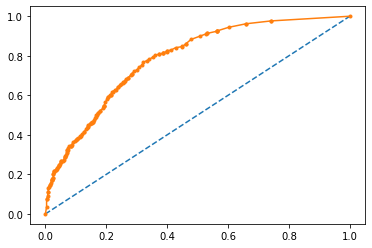

In [28]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, preds[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [29]:
log_loss(y_test, preds[:,1])

0.8082711213348832

### Сохраним наш пайплайн

In [30]:
import dill
with open("model_RF.dill", "wb") as f:
    dill.dump(pipeline, f)